# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

# Question 1

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

#import packages

import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd


In [2]:
model = inauguralproject.inauguralproject()

c:\Users\Yas\Documents\Uni\Vorlesungen\2023FS\Programming\InaguralProject\projects-2023-newteam\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1- par.alpha)*HM**((par.sigma -1)/par.sigma)+ par.alpha*HF**((par.sigma -1)/par.sigma))**(par.sigma/(par.sigma - 1))


alpha = 0.25 and sigma = 0.5, HF/HM = 3.0000 / 5.5000 = 0.5455
alpha = 0.25 and sigma = 1, HF/HM = 2.0000 / 6.5000 = 0.3077
alpha = 0.25 and sigma = 1.5, HF/HM = 1.5000 / 7.0000 = 0.2143
alpha = 0.5 and sigma = 0.5, HF/HM = 4.5000 / 4.5000 = 1.0000
alpha = 0.5 and sigma = 1, HF/HM = 4.5000 / 4.5000 = 1.0000
alpha = 0.5 and sigma = 1.5, HF/HM = 4.5000 / 4.5000 = 1.0000
alpha = 0.75 and sigma = 0.5, HF/HM = 5.5000 / 3.0000 = 1.8333
alpha = 0.75 and sigma = 1, HF/HM = 6.5000 / 2.0000 = 3.2500
alpha = 0.75 and sigma = 1.5, HF/HM = 7.0000 / 1.5000 = 4.6667
[[1.83333333 3.25       4.66666667]
 [1.         1.         1.        ]
 [0.54545455 0.30769231 0.21428571]]


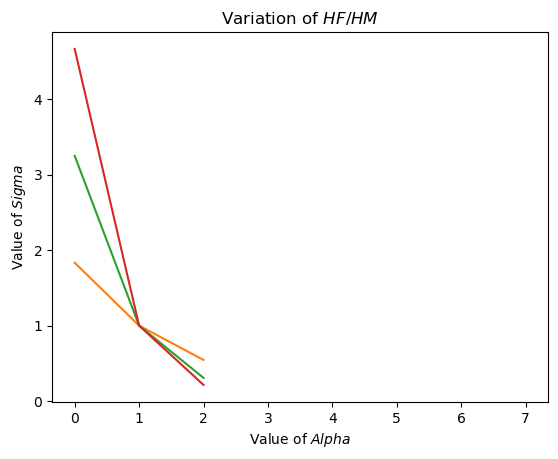

In [3]:
#create list with new values of alpha and solve
al = [0.25, .5, .75]

#create list with new values of sigma and solve
sl = [0.5, 1, 1.5]

optm = np.zeros([3,3])

for it, a in enumerate(al):
    model.par.alpha = a

    for jt, s in enumerate(sl):

        model.par.sigma = s
        opt = model.solve_discrete()
        
        print(f"alpha = {a} and sigma = {s}, HF/HM = {opt.HF:.4f} / {opt.HM:.4f} = {opt.HF/opt.HM:.4f}")

        optm[it, jt] = opt.HM/opt.HF

print(optm)


#plot the results 

#create empty dictionary and store the results
res_HF = {}
res_HM = {}
res_HFHM = {}

res_HF = opt.HF
res_HM = opt.HM
res_HFHM = optm

# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)
ax.plot(res_HF, res_HM, res_HFHM)

#set axis label and title
ax.set_title('Variation of $HF/HM$')
ax.set_xlabel('Value of $Alpha$')
ax.set_ylabel('Value of $Sigma$');              





# Question 2

Explain your code and procedure

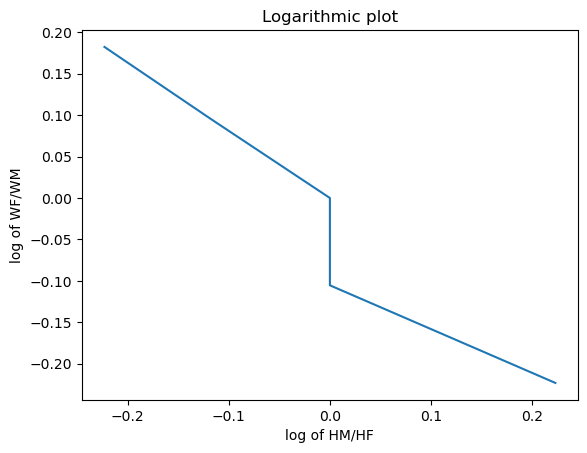

In [4]:

#reset alpha and sigma to default value

model.par.alpha = 0.5
model.par.sigma = 1

#create list with new values of WF
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#create empty lists for storing results
log_HF_HM = np.zeros(5)
log_WF_WM = np.zeros(5)

#loop trough all the values of wF and store the results 

for i, wFl in enumerate(wF_values):
    model.par.wF = wFl
    opt = model.solve_discrete()

    log_HF_HM[i] = np.log(opt.HF/opt.HM)
    log_WF_WM[i] = np.log(model.par.wF/model.par.wM)


# plot the results
plt.plot(log_HF_HM,log_WF_WM)

# Set plot labels and title
plt.xlabel('log of HM/HF')
plt.ylabel('log of WF/WM')
plt.title('Logarithmic plot')

plt.show()


# Question 3

Explain your code and procedure

C:\Users\Yas\AppData\Local\Temp\ipykernel_21020\3806500400.py:5: RuntimeWarning: invalid value encountered in divide
  HFHM = model.sol.HF_vec / model.sol.HM_vec


[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
HF/HM =  [nan nan nan nan nan]
wF/wM =  [0.8 0.9 1.  1.1 1.2]


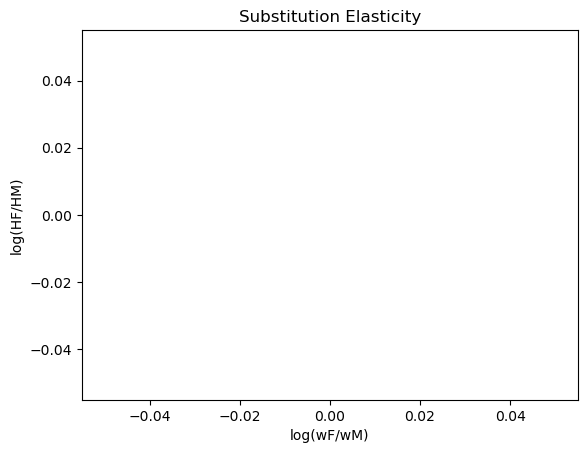

In [5]:
# create model instance
model = inauguralproject.inauguralproject()

# calculate HF/HM and wF/wM
HFHM = model.sol.HF_vec / model.sol.HM_vec
wFwM = model.par.wF_vec / model.par.wM

# take logarithm of both
log_HFHM = np.log(HFHM)
log_wFwM = np.log(wFwM)

# calculate HF and HM to find the problem
print(model.sol.HF_vec)
print(model.sol.HM_vec)
print("HF/HM = ", HFHM)
print("wF/wM = ", wFwM)

# plot
plt.plot(log_wFwM, log_HFHM)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.title('Substitution Elasticity')
plt.show()

Question 4 

Question 5

In [ ]:
#choose alpha such that M and W are equally productive
model.par.alpha = 0.5

ADD CONCISE CONLUSION.